## Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# read csv from pandas
dataframe = pd.read_csv('train.csv')

In [3]:
# print the first five rows
dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# checks the shape of dataframe
dataframe.shape

(2000, 21)

In [5]:
# checks the datatypes of columns
dataframe.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
# gives the information about dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# checks the null values in dataframe
dataframe.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# statistical measure
dataframe.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# gives the correlation matrix
dataframe.corr('pearson')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


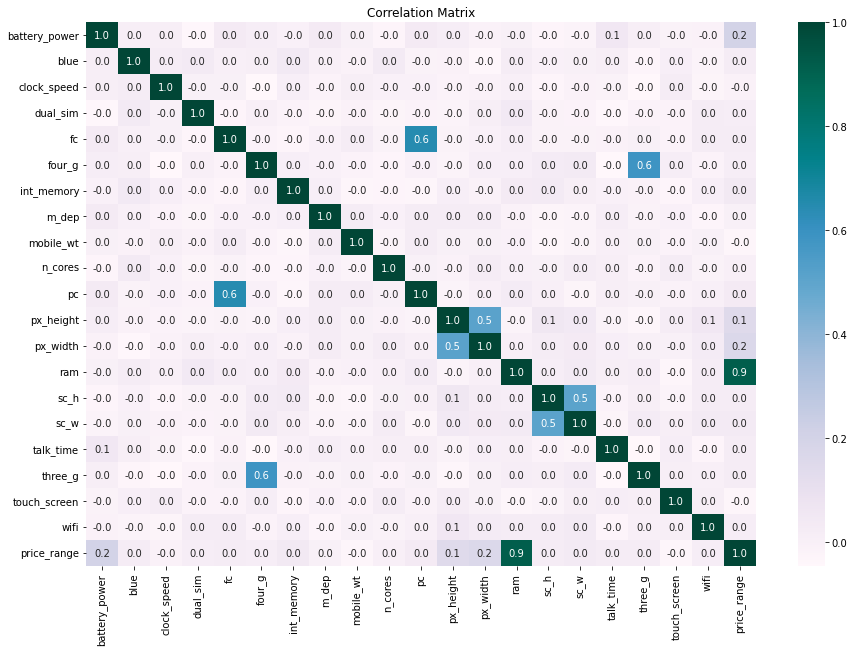

In [10]:
# heat map
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(dataframe.corr(), annot=True, fmt='.1f', cbar=True, cmap='PuBuGn');

## Data Visualization

In [11]:
dataframe['battery_power'].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

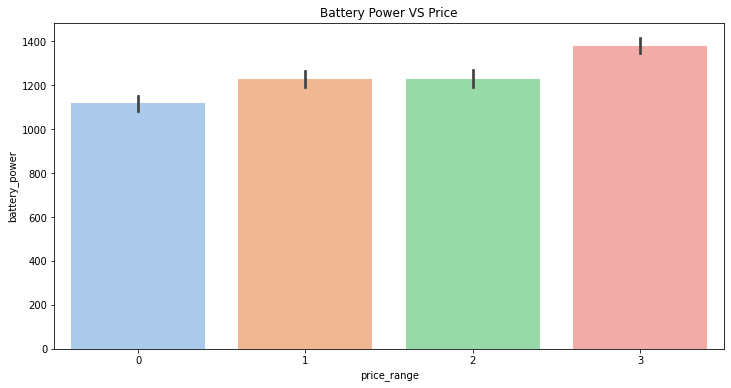

In [12]:
plt.figure(figsize=(12,6))
plt.title('Battery Power VS Price')
sns.barplot(data=dataframe, 
             x='price_range',
             y='battery_power',
             palette='pastel');

## Insight
As the battery power increases mobile price also increases.

In [13]:
dataframe['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [14]:
dataframe['blue'].value_counts(normalize=True)

0    0.505
1    0.495
Name: blue, dtype: float64

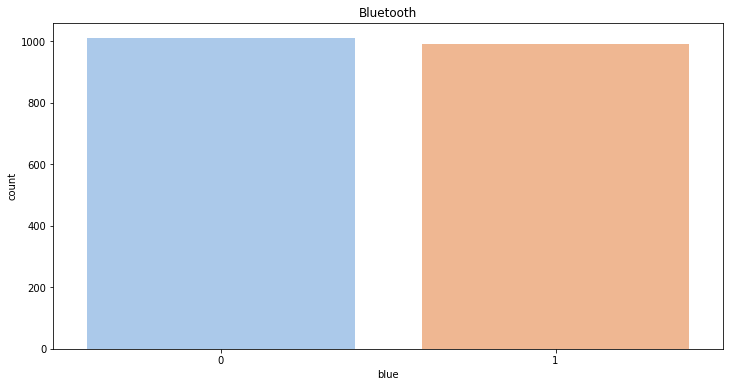

In [15]:
plt.figure(figsize=(12,6))
plt.title('Bluetooth')
sns.countplot(data=dataframe, 
              x='blue', 
              palette='pastel', 
              color='red');

## Insight
Nearly 50% mobile phones have no bluetooth connectivtiy.

In [16]:
dataframe['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

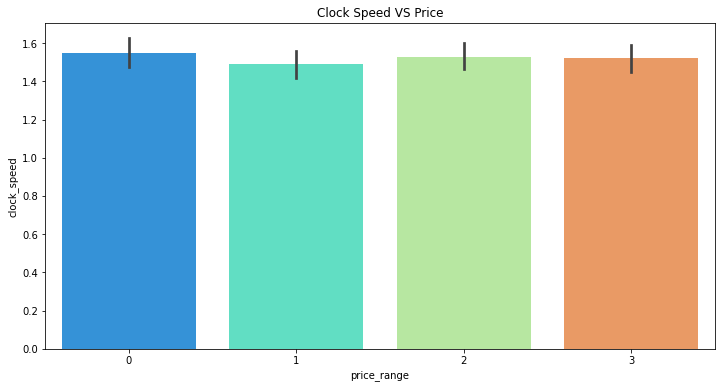

In [17]:
plt.figure(figsize=(12,6))
plt.title('Clock Speed VS Price')
sns.barplot(data=dataframe, 
             x='price_range', 
             y='clock_speed',
             palette='rainbow');

## Insight
As the clock speed increases mobile price decreases.

In [18]:
dataframe['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [19]:
dataframe['dual_sim'].value_counts(normalize=True)

1    0.5095
0    0.4905
Name: dual_sim, dtype: float64

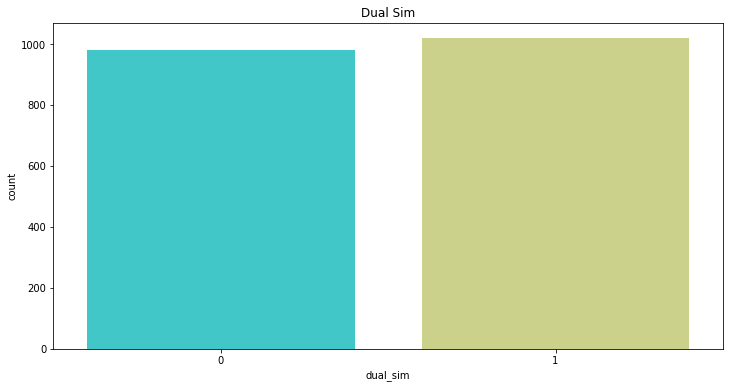

In [20]:
plt.figure(figsize=(12,6))
plt.title('Dual Sim')
sns.countplot(data=dataframe, 
              x='dual_sim', 
              palette='rainbow');

## Insight
Nearly 50% Mobile Phones have dual Sim.

In [21]:
dataframe['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

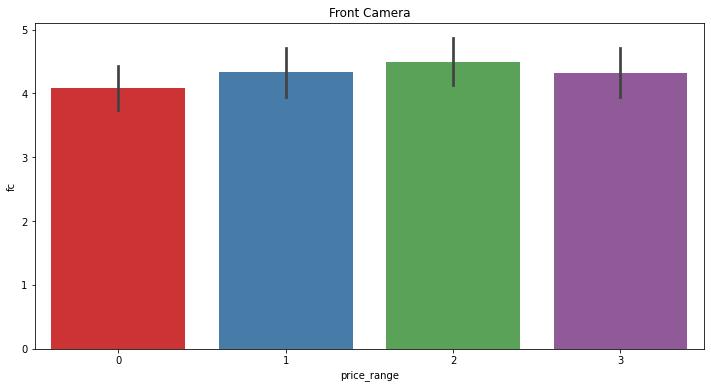

In [22]:
plt.figure(figsize=(12,6))
plt.title('Front Camera')
sns.barplot(data=dataframe, 
             x='price_range',
             y='fc',
             palette='Set1');

## Insight
If mobile has front camera than mobile price will be increasing.

In [23]:
dataframe['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [24]:
dataframe['four_g'].value_counts(normalize=True)

1    0.5215
0    0.4785
Name: four_g, dtype: float64

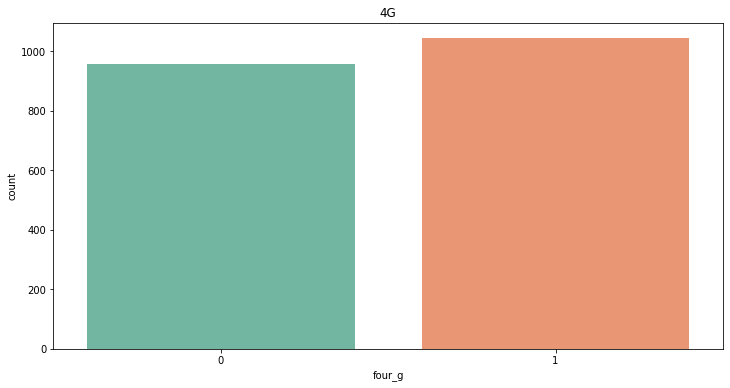

In [25]:
plt.figure(figsize=(12,6))
plt.title('4G')
sns.countplot(data=dataframe, 
              x='four_g', 
              palette='Set2',
              saturation=0.75);

## Insight
More than 50% Mobile Phones have 4G Network.

In [26]:
dataframe['int_memory'].value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

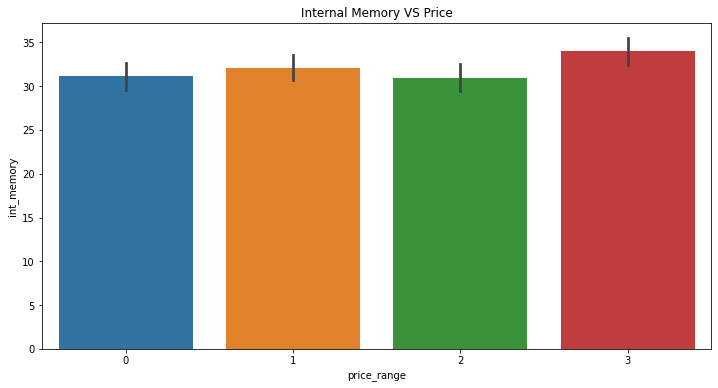

In [27]:
plt.figure(figsize=(12,6))
plt.title('Internal Memory VS Price')
sns.barplot(data=dataframe, x='price_range', y='int_memory');

## Insight
If the internal memory increases mobile price also increases.

In [28]:
dataframe['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

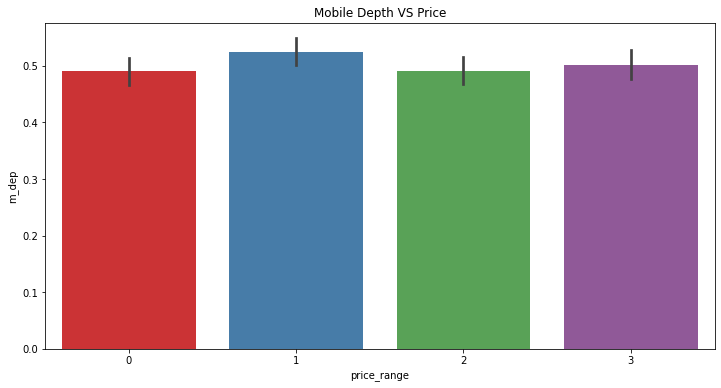

In [29]:
plt.figure(figsize=(12,6))
plt.title('Mobile Depth VS Price')
sns.barplot(data=dataframe, 
             x='price_range',
             y='m_dep',
             palette='Set1');

## Insight
As the mobile depth increases price range decreases.

In [30]:
dataframe['mobile_wt'].value_counts()

182    28
101    27
185    27
146    26
199    26
       ..
116    10
140     9
120     9
149     9
96      9
Name: mobile_wt, Length: 121, dtype: int64

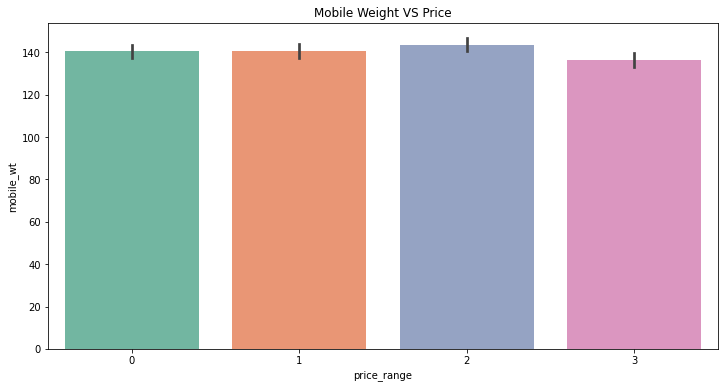

In [31]:
plt.figure(figsize=(12,6))
plt.title('Mobile Weight VS Price')
sns.barplot(data=dataframe, 
             x='price_range',
             y='mobile_wt',
             palette='Set2');

## Insight
As mobile weight increases mobile price decreases.

In [32]:
dataframe['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

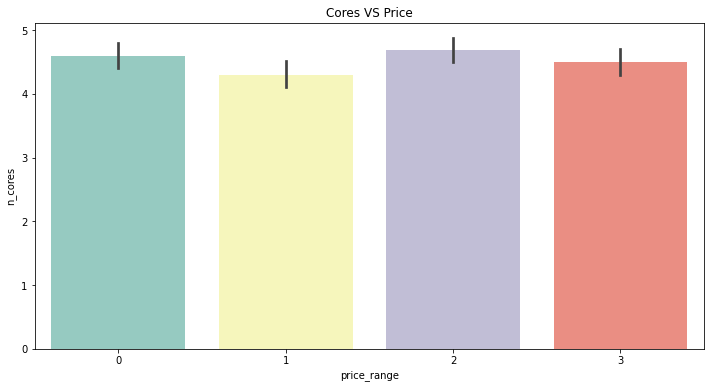

In [33]:
plt.figure(figsize=(12,6))
plt.title('Cores VS Price')
sns.barplot(data=dataframe, 
             x='price_range',
             y='n_cores',
             palette='Set3');

## Insight
AS number of cores increases mobile price decreases.

In [34]:
dataframe['pc'].value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

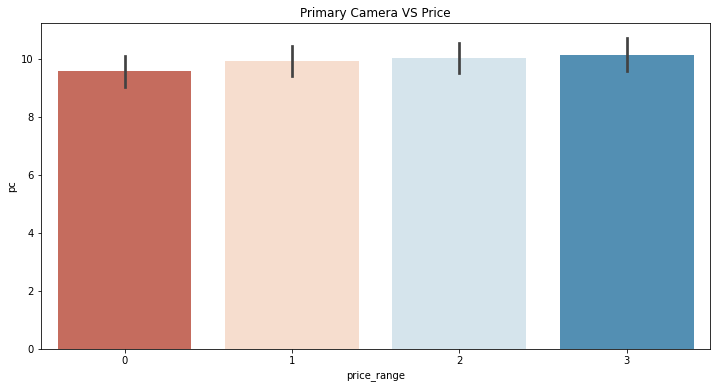

In [35]:
plt.figure(figsize=(12,6))
plt.title('Primary Camera VS Price')
sns.barplot(data=dataframe, 
            x='price_range', 
            y='pc', 
            palette='RdBu');

## Insight
If mobile has primary camera than mobile price will be increasing.

In [36]:
dataframe['px_height'].value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

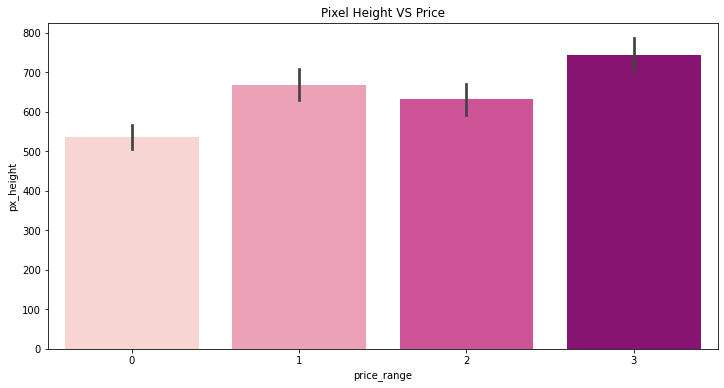

In [37]:
plt.figure(figsize=(12,6))
plt.title('Pixel Height VS Price')
sns.barplot(data=dataframe, 
            x='price_range',
            y='px_height',
            palette='RdPu');

## Insight
As pixel height increases mobile price also increases.

In [38]:
dataframe['px_width'].value_counts()

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1125    1
1367    1
1569    1
1481    1
1632    1
Name: px_width, Length: 1109, dtype: int64

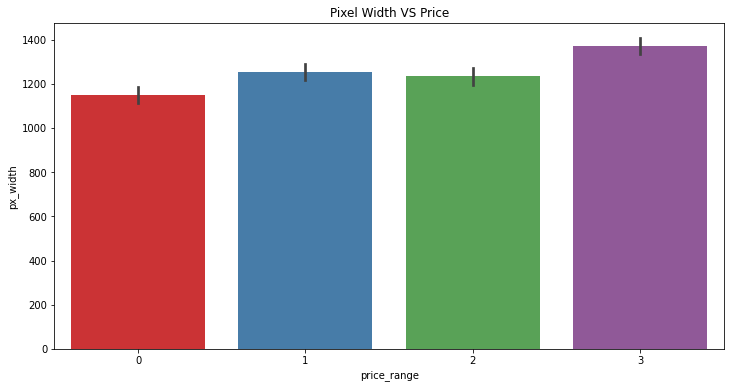

In [39]:
plt.figure(figsize=(12,6))
plt.title('Pixel Width VS Price')
sns.barplot(data=dataframe, 
             x='price_range',
             y='px_width',
             palette='Set1');

## Insight
As pixel width increases mobile price also increases.

In [40]:
dataframe['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

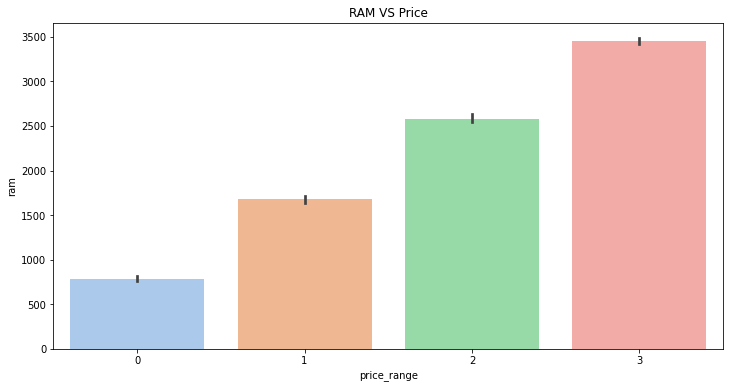

In [41]:
plt.figure(figsize=(12,6))
plt.title('RAM VS Price')
sns.barplot(data=dataframe, 
             x='price_range',
             y='ram',
             palette='pastel');

## Insight
As Ram increases mobile price increases.

In [42]:
dataframe['sc_h'].value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

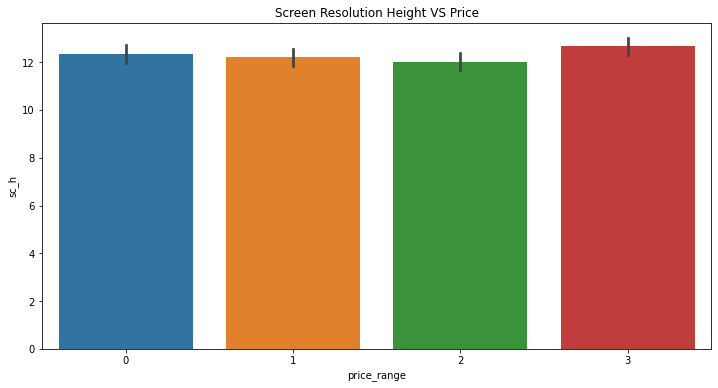

In [43]:
plt.figure(figsize=(12,6))
plt.title('Screen Resolution Height VS Price')
sns.barplot(data=dataframe, 
            x='price_range', 
            y='sc_h');

## Insight
As screen resolution height increases mobile price also increases.

In [44]:
dataframe['sc_w'].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

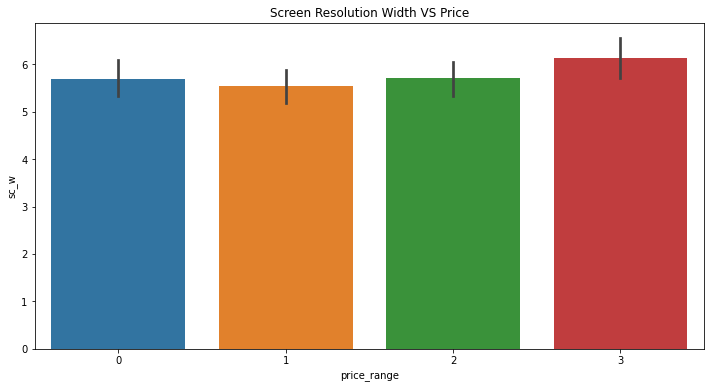

In [45]:
plt.figure(figsize=(12,6))
plt.title('Screen Resolution Width VS Price')
sns.barplot(data=dataframe, 
            x='price_range',
            y='sc_w');

## Insight
As screen resolution width increases mobile price also increases.

In [46]:
dataframe['talk_time'].value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

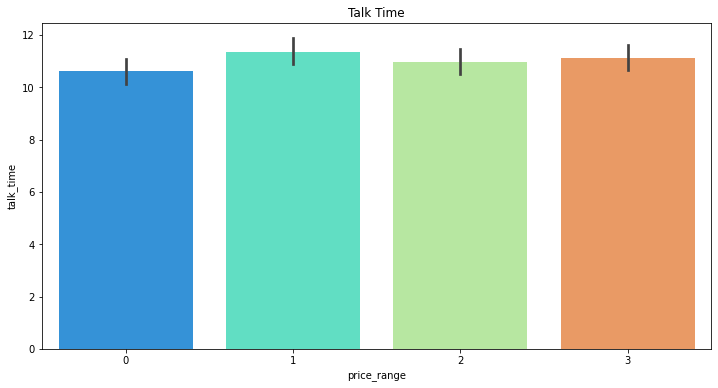

In [47]:
plt.figure(figsize=(12,6))
plt.title('Talk Time')
sns.barplot(data=dataframe, 
            x='price_range',
            y='talk_time',
            palette='rainbow');

In [48]:
dataframe['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [49]:
dataframe['three_g'].value_counts(normalize=True)

1    0.7615
0    0.2385
Name: three_g, dtype: float64

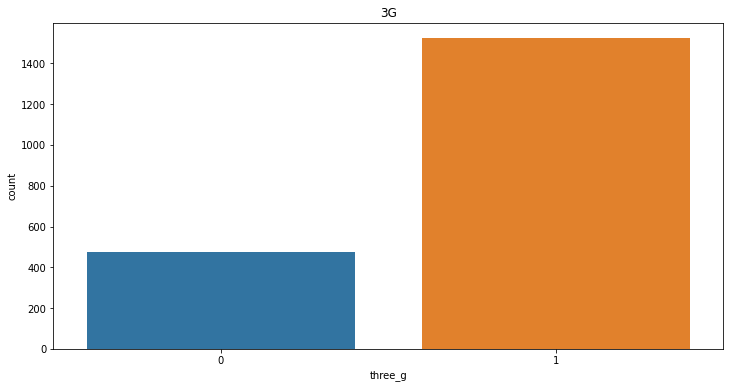

In [50]:
plt.figure(figsize=(12,6))
plt.title('3G')
sns.countplot(data=dataframe, x='three_g');

## Insight
More than 70% Mobile Phones have 3G Network.

In [51]:
dataframe['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [52]:
dataframe['touch_screen'].value_counts(normalize=True)

1    0.503
0    0.497
Name: touch_screen, dtype: float64

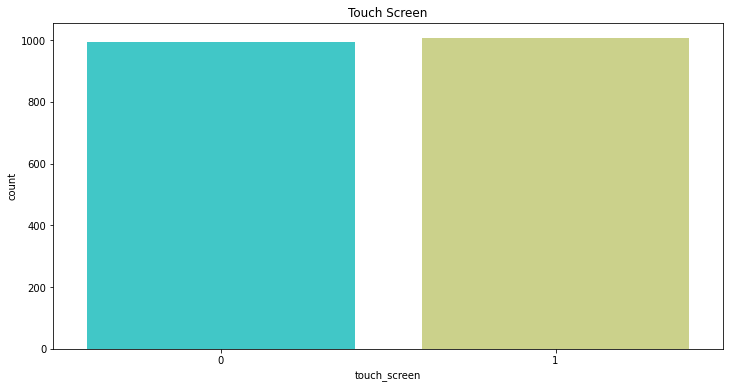

In [53]:
plt.figure(figsize=(12,6))
plt.title('Touch Screen')
sns.countplot(data=dataframe, x='touch_screen', palette='rainbow');

## Insight
Nearly 50% Mobile Phones have TouchScreen.

In [54]:
dataframe['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [55]:
dataframe['wifi'].value_counts(normalize=True)

1    0.507
0    0.493
Name: wifi, dtype: float64

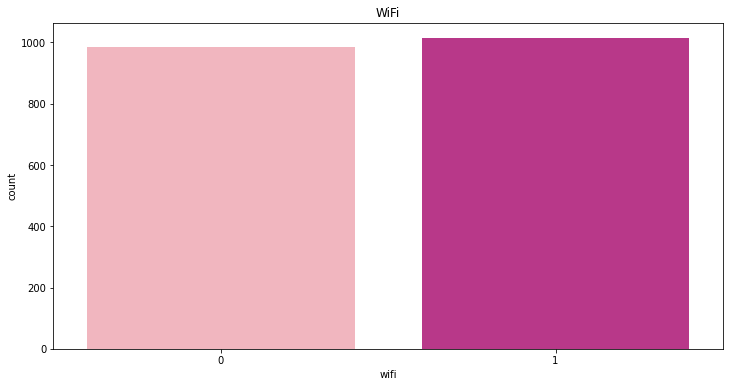

In [56]:
plt.figure(figsize=(12,6))
plt.title('WiFi')
sns.countplot(data=dataframe, x='wifi', palette='RdPu');

## Insight
Nearly 50%  Mobile Phones have WiFi.

## Seprating Dependent and Independent Features

In [57]:
X = dataframe.drop('price_range', axis=1)
Y = dataframe['price_range']

In [58]:
print(X)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [59]:
print(Y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


## Train Test Split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [73]:
print('X :',X.shape)
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X : (2000, 20)
X_train : (1600, 20)
X_test : (400, 20)


## Model Building

In [74]:
model = RandomForestClassifier()

In [75]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [76]:
X_train_prediction = model.predict(X_train)
print('X_train_prediction :', X_train_prediction)

X_train_prediction : [1 3 2 ... 0 3 2]


In [77]:
train_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Train Data Accuracy :', train_data_accuracy)

Train Data Accuracy : 1.0


In [78]:
X_test_prediction = model.predict(X_test)
print('X_test_prediction :', X_test_prediction)

X_test_prediction : [0 2 0 2 3 1 3 3 1 2 1 0 2 3 0 3 2 1 1 3 1 2 0 1 3 2 2 0 0 2 0 3 0 1 1 0 3
 0 2 2 1 1 3 3 2 0 3 2 1 2 1 3 3 2 3 0 1 0 1 1 1 2 1 2 0 2 0 0 0 3 1 0 0 2
 0 2 2 3 2 3 2 2 2 0 0 3 2 2 0 1 1 2 0 0 1 2 0 3 2 0 1 3 1 1 2 3 3 3 2 1 3
 1 1 2 3 0 0 2 1 2 0 3 3 0 3 0 3 1 0 0 1 3 2 1 0 3 3 0 2 0 1 3 3 0 3 2 1 3
 0 1 2 2 1 3 0 3 0 2 1 1 1 1 3 0 0 3 2 3 1 0 2 1 0 3 0 1 1 1 3 3 2 2 1 1 1
 0 0 1 3 1 1 0 1 1 3 2 0 1 3 1 0 2 3 0 3 2 2 2 2 3 3 2 1 0 3 1 0 1 3 0 0 3
 0 1 1 0 1 3 1 2 3 3 3 0 3 0 1 2 0 3 2 2 2 0 2 3 0 3 0 1 1 0 1 3 2 1 1 3 3
 0 0 0 3 3 0 3 1 0 1 0 2 0 2 0 0 0 2 0 2 0 3 3 0 2 2 1 1 2 1 3 0 0 3 1 3 1
 2 0 1 0 3 0 2 3 3 3 2 3 0 0 2 2 1 0 1 3 2 2 0 0 2 0 2 2 2 2 3 3 1 3 1 3 2
 1 3 3 0 1 2 2 2 2 3 0 0 1 0 2 2 3 0 1 3 1 2 2 2 1 0 1 2 3 3 0 1 2 0 1 3 2
 1 3 1 0 1 3 0 1 1 1 2 1 0 1 2 2 1 0 3 2 1 1 0 0 2 0 3 1 3 3]


In [79]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Test Data Accuracy :', test_data_accuracy)

Test Data Accuracy : 0.9025


## Loss

In [81]:
mae = mean_absolute_error(Y_test, X_test_prediction)
print('Mean Absolute Error :', mae)

rmse = np.sqrt(mean_squared_error(Y_test, X_test_prediction))
print('Root Mean Squared Error :', rmse)

Mean Absolute Error : 0.0975
Root Mean Squared Error : 0.3122498999199199


## Confusion Matrix

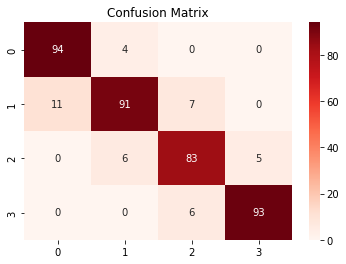

In [82]:
cnf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.title("Confusion Matrix")
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Reds');

## Classification Report

In [83]:
clf_report = classification_report(Y_test, X_test_prediction)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        98
           1       0.90      0.83      0.87       109
           2       0.86      0.88      0.87        94
           3       0.95      0.94      0.94        99

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

